# **Digit Recognizer**

**Competition Description**

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images

In [ ]:
from IPython.display import Image
Image(url= "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.rmWbidEzubGp_bFVpQpjoQHaEV%26pid%3DApi&f=1")

## **Collecting the Data**

training data set and testing data set are given by Kaggle you can download from kaggle directly

link-https://www.kaggle.com/c/digit-recognizer/data

## load train, test dataset

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [9]:
pip install mnist

In [10]:
import mnist

train_images=mnist.train_images()
train_labels=mnist.train_labels()
test_images=mnist.test_images()
test_labels=mnist.test_labels()

In [11]:
import pandas as pd
test_kaggle=pd.read_csv('test.csv')

## Exploritory Data analysis

In [12]:
train_images=train_images/255
test_images=test_images/255

We are scaling down the images between 0 and 1

Y divide by 255

Because that is the highest value of a pixel in this dataset

In [13]:
train_images=train_images.reshape((-1,784))
test_images=test_images.reshape((-1,784))

Now we reshape the pixels to an 1d array so that we can feed it to neural network

In [12]:
train_images.shape

(60000, 784)

In [13]:
test_images.shape

(10000, 784)

## Data Visulization

Seaborn and Matplot lib is an excellent library used fro data visulization in python

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


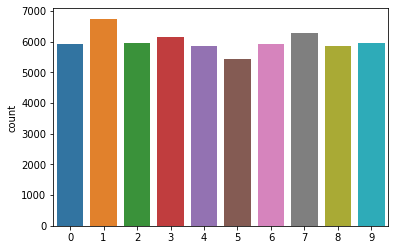

In [17]:
import seaborn as sns
sns.countplot(train_labels)

**We can see that the distribution of the data is uniform**

In [19]:
train_kaggle=pd.read_csv('train.csv')
train_kaggle=train_kaggle.drop(['label'],axis=1)
train_kaggle=train_kaggle.values.reshape(train_kaggle.shape[0], 28, 28)
train_kaggle=train_kaggle/255


**We will plot some random sample data**

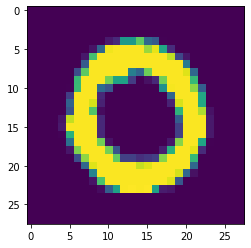

In [20]:
from matplotlib import pyplot as plt
plt.imshow(train_kaggle[1])

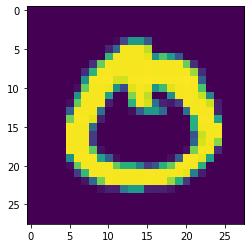

In [21]:
plt.imshow(train_kaggle[23])

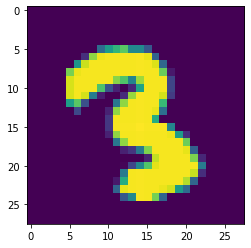

In [22]:
plt.imshow(train_kaggle[1324])

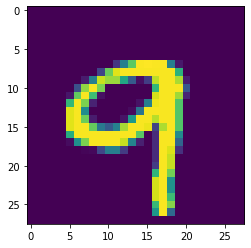

In [23]:
plt.imshow(train_kaggle[2132])

## Model Creation and Training

**We are creating an Artificial Neural Network in order to categorize the images into ten categories**

We are using Keras library to build a neural network

In [15]:

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid


In [25]:
model=keras.Sequential()

In [26]:
# Adding the input layer and the first hidden layer
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform',input_dim=784))

# Adding the second hidden layer
model.add(Dense(units = 64, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
model.add(Dense(units= 10, kernel_initializer = 'glorot_uniform', activation = 'softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compiling the ANN
model.compile(optimizer = 'Adamax', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
from keras.utils import to_categorical
# Fitting the ANN to the Training set
model_history=model.fit(train_images,
                             to_categorical(train_labels)
                            ,batch_size = 10, 
                              nb_epoch = 10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 26s 437us/step - loss: 0.2399 - accuracy: 0.9294
Epoch 2/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.1116 - accuracy: 0.9669
Epoch 3/10
60000/60000 [==============================] - 23s 388us/step - loss: 0.0798 - accuracy: 0.9756
Epoch 4/10
60000/60000 [==============================] - 23s 390us/step - loss: 0.0610 - accuracy: 0.9820
Epoch 5/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.0493 - accuracy: 0.9850
Epoch 6/10
60000/60000 [==============================] - 24s 400us/step - loss: 0.0400 - accuracy: 0.9875
Epoch 7/10
60000/60000 [==============================] - 23s 390us/step - loss: 0.0324 - accuracy: 0.9907
Epoch 8/10
60000/60000 [==============================] - 23s 392us/step - loss: 0.0265 - accuracy: 0.9924
Epoch 9/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.0223 - accuracy: 0.9936
Epoch 10/10
60000/60000 [============

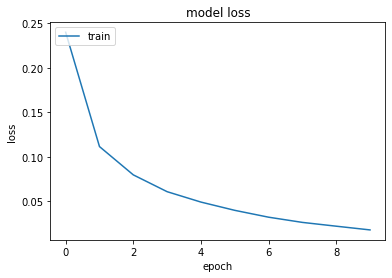

In [31]:

# summarize history for loss
plt.plot(model_history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Hyper parameter Tuning


We will perform some Hyperparameter optimiztion in order to get the best hyperparamteres which will provide us with  best results

We are using **Randomized search cv** provided by scikit learn to perform hyperparameter optimization

In [ ]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=784))
            model.add(Activation(activation))
            model.add(Dropout(0.1))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.1))
            
    model.add(Dense(units = 10, kernel_initializer= 'glorot_uniform', activation = 'softmax')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model)

In [ ]:
layers = [ (128, 64),(64,64),(64,32,16)]
activations = [ 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [10], epochs=[10])

In [ ]:
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,cv=5)

In [ ]:
grid_result = grid.fit(train_images,  to_categorical(train_labels))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Epoch 1/10
48000/48000 [==============================] - 21s 445us/step - loss: 0.2671 - accuracy: 0.9205
Epoch 2/10
48000/48000 [==============================] - 21s 447us/step - loss: 0.1355 - accuracy: 0.9596
Epoch 3/10
48000/48000 [==============================] - 22s 451us/step - loss: 0.1023 - accuracy: 0.9686
Epoch 4/10
48000/48000 [==============================] - 21s 445us/step - loss: 0.0839 - accuracy: 0.9743
Epoch 5/10
48000/48000 [==============================] - 21s 445us/step - loss: 0.0724 - accuracy: 0.9779
Epoch 6/10
48000/48000 [==============================] - 21s 445us/step - loss: 0.0666 - accuracy: 0.9784
Epoch 7/10
48000/48000 [==============================] - 21s 444us/step - loss: 0.0592 - accuracy: 0.9812
Epoch 8/10
48000/48000 [==============================] - 21s 443us/step - loss: 0.0520 - accuracy: 0.9837
Epoch 9/10
48000/48000 [==============================] - 21s 444us/step - loss: 0.0517 - accuracy: 0.9839
Epoch 10/10
12000/12000 [============

In [ ]:
print("Best Score:",grid_result.best_score_)
print("-------------------------------------------------------------")
print("Best Parameters selected:",grid_result.best_params_)

Best Score: 0.9745833396911621
-------------------------------------------------------------
Best Parameters selected: {'layers': (128, 64), 'epochs': 10, 'batch_size': 10, 'activation': 'relu'}


**So we have got the best hyper paramters that we will use to build our final model**

In [16]:
model=keras.Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform',input_dim=784))

# Adding the second hidden layer
model.add(Dense(units = 64, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
model.add(Dense(units= 10, kernel_initializer = 'glorot_uniform', activation = 'softmax'))

In [17]:
# Compiling the ANN
model.compile(optimizer = 'Adamax', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
from keras.utils import to_categorical
# Fitting the ANN to the Training set
model_history=model.fit(train_images,
                             to_categorical(train_labels)
                            ,batch_size = 10, 
                              epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 23s 392us/step - loss: 0.1960 - accuracy: 0.9437
Epoch 2/20
60000/60000 [==============================] - 24s 395us/step - loss: 0.1850 - accuracy: 0.9463
Epoch 3/20
60000/60000 [==============================] - 24s 396us/step - loss: 0.1754 - accuracy: 0.9488
Epoch 4/20
60000/60000 [==============================] - 24s 393us/step - loss: 0.1672 - accuracy: 0.9507
Epoch 5/20
60000/60000 [==============================] - 24s 400us/step - loss: 0.1597 - accuracy: 0.9533
Epoch 6/20
60000/60000 [==============================] - 23s 387us/step - loss: 0.1526 - accuracy: 0.9557
Epoch 7/20
60000/60000 [==============================] - 23s 388us/step - loss: 0.1469 - accuracy: 0.9572
Epoch 8/20
60000/60000 [==============================] - 23s 391us/step - loss: 0.1415 - accuracy: 0.9586
Epoch 9/20
60000/60000 [==============================] - 23s 387us/step - loss: 0.1365 - accuracy: 0.9601
Epoch 10/20
60000/60000 [============

We have got an accuracy of **97.19** on our training dataset

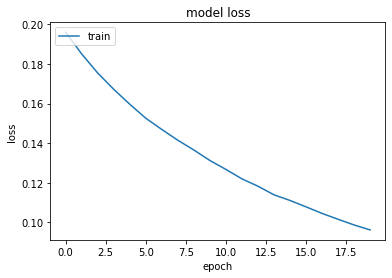

In [21]:
# summarize history for loss
from matplotlib import pyplot as plt
plt.plot(model_history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We will check for the acuraccy on testing dataset

In [22]:
model.evaluate(test_images,to_categorical(test_labels))

10000/10000 [==============================] - 1s 77us/step


[0.11262822444960476, 0.9664000272750854]

### Prediction

In [23]:
ans=model.predict(test_kaggle)

In [24]:
import numpy as np
ans=np.argmax(ans,axis=1)


In [25]:
ans[:5]

array([2, 0, 9, 2, 3])

In [26]:
predicted_classes = model.predict_classes(test_kaggle)
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)),
                         "Label": predicted_classes})
submissions.to_csv("subbmision2.csv", index=False, header=True)

In [43]:
ls

drive/  sample_data/  subbmision2.csv  test.csv  train.csv
